# QUESTION NO 2

In [1]:
import numpy as np
import pandas as pd

# IMPLEMENTATION FROM SCRATCH

In [3]:
#preprocessing
data = pd.read_excel('Data.xlsx', header=None)  
X = data.iloc[:, 0:4].values
X_std = np.random.rand(150, 4) 

X_std = (X - X.mean(axis=0)) / X.std(axis=0)
data

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
#euclidean distance
def calculate_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [5]:
#making the distance matrix 
def calculate_distance_matrix(points):
    n = len(points)
    dist_matrix = np.zeros((n, n))
    #loop through all the points and calculate the distance
    for i in range(n):
        for j in range(i + 1, n):
            dist = calculate_distance(points[i], points[j])
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    return dist_matrix

In [6]:
#finding the closest clusters
def find_closest_clusters(dist_matrix):
    n = len(dist_matrix)
    min_dist = float('inf')
    min_i, min_j = -1, -1
    #loop through all the points and find the minimum distance
    for i in range(n):
        for j in range(i + 1, n):
            if dist_matrix[i, j] < min_dist:
                min_dist = dist_matrix[i, j]
                min_i, min_j = i, j
    return min_i, min_j, min_dist

In [7]:
#merging clusters single llinkage
def merge_clusters_single_linkage(dist_matrix, i, j):
    n = len(dist_matrix)
    new_matrix = np.zeros((n-1, n-1))
    mask = np.ones(n, dtype=bool)
    mask[j] = False
    indices = np.arange(n)[mask]
    #loop through all the points and merge the clusters
    for k in range(n-1):
        for l in range(k+1, n-1):
            new_matrix[k, l]=dist_matrix[indices[k], indices[l]]
            new_matrix[l, k]=dist_matrix[indices[l], indices[k]]
    #loop through all the remaining points and store the minimum distance between the clusters
    for k in range(n-1):
        if k != i:
            dist = min(dist_matrix[i, indices[k]], dist_matrix[j, indices[k]])
            new_matrix[i, k]=dist
            new_matrix[k, i]=dist
    return new_matrix

In [8]:
#hierarchical clustering single linkage
def hierarchical_clustering_single_linkage(X):
    n_samples = len(X)
    current_clusters = [[i] for i in range(n_samples)]
    dist_matrix = calculate_distance_matrix(X)
    merge_history = []
    
    while len(current_clusters) > 1:
        i, j, min_dist = find_closest_clusters(dist_matrix)
        merge_history.append({
            'clusters_merged': (min(i, j), max(i, j)),
            'distance': min_dist,
            'cluster_sizes': (len(current_clusters[i]), len(current_clusters[j]))
        })
        new_cluster = current_clusters[i] + current_clusters[j]
        current_clusters = [cluster for idx, cluster in enumerate(current_clusters) if idx not in (i, j)]
        current_clusters.append(new_cluster)
        dist_matrix = merge_clusters_single_linkage(dist_matrix, i, j)
    
    return merge_history


In [9]:
#MERGING CLUSTERS COMPLETE LINKAGE
def merge_clusters_complete_linkage(dist_matrix, i, j):
    n = len(dist_matrix)
    new_matrix = np.zeros((n-1, n-1))
    mask = np.ones(n, dtype=bool)
    mask[j] = False
    indices = np.arange(n)[mask]
    
    for k in range(n-1):
        for l in range(k+1, n-1):
            new_matrix[k, l] = dist_matrix[indices[k], indices[l]]
            new_matrix[l, k] = dist_matrix[indices[l], indices[k]]
    
    for k in range(n-1):
        if k != i:
            dist = max(dist_matrix[i, indices[k]], dist_matrix[j, indices[k]])
            new_matrix[i, k] = dist
            new_matrix[k, i] = dist
                
    return new_matrix

In [10]:
#COMPLETE LINKAGE IMPLEMENTATION
def hierarchical_clustering_complete_linkage(X):
    n_samples = len(X)
    current_clusters = [[i] for i in range(n_samples)]
    dist_matrix = calculate_distance_matrix(X)
    merge_history = []
    
    while len(current_clusters) > 1:
        i, j, min_dist = find_closest_clusters(dist_matrix)
        merge_history.append({
            'clusters_merged': (min(i, j), max(i, j)),
            'distance': min_dist,
            'cluster_sizes': (len(current_clusters[i]), len(current_clusters[j]))
        })
        new_cluster = current_clusters[i] + current_clusters[j]
        current_clusters = [cluster for idx, cluster in enumerate(current_clusters) if idx not in (i, j)]
        current_clusters.append(new_cluster)
        dist_matrix = merge_clusters_complete_linkage(dist_matrix, i, j)
    
    return merge_history


In [11]:
#MERGING CLUSTERS AVERAGE LINKAGE
def merge_clusters_average_linkage(dist_matrix, i, j):
    n = len(dist_matrix)
    new_matrix = np.zeros((n-1, n-1))
    mask = np.ones(n, dtype=bool)
    mask[j] = False
    indices = np.arange(n)[mask]
    
    for k in range(n-1):
        for l in range(k+1, n-1):
            new_matrix[k, l] = dist_matrix[indices[k], indices[l]]
            new_matrix[l, k] = dist_matrix[indices[l], indices[k]]
    
    for k in range(n-1):
        if k != i:
            dist = (dist_matrix[i, indices[k]] + dist_matrix[j, indices[k]]) / 2
            new_matrix[i, k] = dist
            new_matrix[k, i] = dist
                
    return new_matrix

In [12]:
#AVERAGE LINKAGE IMPLEMENTATION
def hierarchical_clustering_average_linkage(X):
    n_samples = len(X)
    current_clusters = [[i] for i in range(n_samples)]
    dist_matrix = calculate_distance_matrix(X)
    merge_history = []
    
    while len(current_clusters) > 1:
        i, j, min_dist = find_closest_clusters(dist_matrix)
        merge_history.append({
            'clusters_merged': (min(i, j), max(i, j)),
            'distance': min_dist,
            'cluster_sizes': (len(current_clusters[i]), len(current_clusters[j]))
        })
        new_cluster = current_clusters[i] + current_clusters[j]
        current_clusters = [cluster for idx, cluster in enumerate(current_clusters) if idx not in (i, j)]
        current_clusters.append(new_cluster)
        dist_matrix = merge_clusters_average_linkage(dist_matrix, i, j)
    
    return merge_history


In [13]:
merge_history_single = hierarchical_clustering_single_linkage(X)
merge_history_complete = hierarchical_clustering_complete_linkage(X)
merge_history_average = hierarchical_clustering_average_linkage(X)


In [14]:
merge_history_single = hierarchical_clustering_single_linkage(X_std)

print("SINGLE LINKAGE CLUSTERING STEPS:") 
for i, step in enumerate(merge_history_single, 1):
    print(f"Step {i}:")
    print(f"  Merged clusters: {step['clusters_merged']}")
    print(f"  Distance: {step['distance']:.4f}")
    print(f"  Cluster sizes: {step['cluster_sizes']}")


SINGLE LINKAGE CLUSTERING STEPS:
Step 1:
  Merged clusters: (101, 142)
  Distance: 0.0000
  Cluster sizes: (1, 1)
Step 2:
  Merged clusters: (7, 39)
  Distance: 0.1212
  Cluster sizes: (1, 1)
Step 3:
  Merged clusters: (10, 47)
  Distance: 0.1212
  Cluster sizes: (1, 1)
Step 4:
  Merged clusters: (9, 34)
  Distance: 0.1316
  Cluster sizes: (1, 1)
Step 5:
  Merged clusters: (0, 17)
  Distance: 0.1316
  Cluster sizes: (1, 1)
Step 6:
  Merged clusters: (124, 128)
  Distance: 0.1316
  Cluster sizes: (1, 1)
Step 7:
  Merged clusters: (0, 37)
  Distance: 0.1338
  Cluster sizes: (1, 1)
Step 8:
  Merged clusters: (122, 132)
  Distance: 0.1338
  Cluster sizes: (1, 1)
Step 9:
  Merged clusters: (2, 43)
  Distance: 0.1338
  Cluster sizes: (1, 1)
Step 10:
  Merged clusters: (9, 29)
  Distance: 0.1338
  Cluster sizes: (1, 1)
Step 11:
  Merged clusters: (0, 26)
  Distance: 0.1338
  Cluster sizes: (1, 1)
Step 12:
  Merged clusters: (7, 26)
  Distance: 0.1338
  Cluster sizes: (1, 1)
Step 13:
  Merged 

In [15]:
merge_history_complete = hierarchical_clustering_single_linkage(X_std)

print("COMPLETE LINKAGE CLUSTERING STEPS:")
for i, step in enumerate(merge_history_single, 1):
    print(f"Step {i}:")
    print(f"  Merged clusters: {step['clusters_merged']}")
    print(f"  Distance: {step['distance']:.4f}")
    print(f"  Cluster sizes: {step['cluster_sizes']}")

COMPLETE LINKAGE CLUSTERING STEPS:
Step 1:
  Merged clusters: (101, 142)
  Distance: 0.0000
  Cluster sizes: (1, 1)
Step 2:
  Merged clusters: (7, 39)
  Distance: 0.1212
  Cluster sizes: (1, 1)
Step 3:
  Merged clusters: (10, 47)
  Distance: 0.1212
  Cluster sizes: (1, 1)
Step 4:
  Merged clusters: (9, 34)
  Distance: 0.1316
  Cluster sizes: (1, 1)
Step 5:
  Merged clusters: (0, 17)
  Distance: 0.1316
  Cluster sizes: (1, 1)
Step 6:
  Merged clusters: (124, 128)
  Distance: 0.1316
  Cluster sizes: (1, 1)
Step 7:
  Merged clusters: (0, 37)
  Distance: 0.1338
  Cluster sizes: (1, 1)
Step 8:
  Merged clusters: (122, 132)
  Distance: 0.1338
  Cluster sizes: (1, 1)
Step 9:
  Merged clusters: (2, 43)
  Distance: 0.1338
  Cluster sizes: (1, 1)
Step 10:
  Merged clusters: (9, 29)
  Distance: 0.1338
  Cluster sizes: (1, 1)
Step 11:
  Merged clusters: (0, 26)
  Distance: 0.1338
  Cluster sizes: (1, 1)
Step 12:
  Merged clusters: (7, 26)
  Distance: 0.1338
  Cluster sizes: (1, 1)
Step 13:
  Merge

In [16]:
merge_history_average = hierarchical_clustering_single_linkage(X_std)

print("AVERAGE LINKAGE CLUSTERING STEPS:")
for i, step in enumerate(merge_history_single, 1):
    print(f"Step {i}:")
    print(f"  Merged clusters: {step['clusters_merged']}")
    print(f"  Distance: {step['distance']:.4f}")
    print(f"  Cluster sizes: {step['cluster_sizes']}")

AVERAGE LINKAGE CLUSTERING STEPS:
Step 1:
  Merged clusters: (101, 142)
  Distance: 0.0000
  Cluster sizes: (1, 1)
Step 2:
  Merged clusters: (7, 39)
  Distance: 0.1212
  Cluster sizes: (1, 1)
Step 3:
  Merged clusters: (10, 47)
  Distance: 0.1212
  Cluster sizes: (1, 1)
Step 4:
  Merged clusters: (9, 34)
  Distance: 0.1316
  Cluster sizes: (1, 1)
Step 5:
  Merged clusters: (0, 17)
  Distance: 0.1316
  Cluster sizes: (1, 1)
Step 6:
  Merged clusters: (124, 128)
  Distance: 0.1316
  Cluster sizes: (1, 1)
Step 7:
  Merged clusters: (0, 37)
  Distance: 0.1338
  Cluster sizes: (1, 1)
Step 8:
  Merged clusters: (122, 132)
  Distance: 0.1338
  Cluster sizes: (1, 1)
Step 9:
  Merged clusters: (2, 43)
  Distance: 0.1338
  Cluster sizes: (1, 1)
Step 10:
  Merged clusters: (9, 29)
  Distance: 0.1338
  Cluster sizes: (1, 1)
Step 11:
  Merged clusters: (0, 26)
  Distance: 0.1338
  Cluster sizes: (1, 1)
Step 12:
  Merged clusters: (7, 26)
  Distance: 0.1338
  Cluster sizes: (1, 1)
Step 13:
  Merged

# FOR VISUALIZATION

/var/folders/dz/tmzcb2_j20bbp4pjqn9xwlvw0000gn/T/ipykernel_3929/407078146.py:29: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = sch.linkage(dist_matrix, method='single')
/var/folders/dz/tmzcb2_j20bbp4pjqn9xwlvw0000gn/T/ipykernel_3929/407078146.py:35: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = sch.linkage(dist_matrix, method='complete')
/var/folders/dz/tmzcb2_j20bbp4pjqn9xwlvw0000gn/T/ipykernel_3929/407078146.py:40: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = sch.linkage(dist_matrix, method='average')


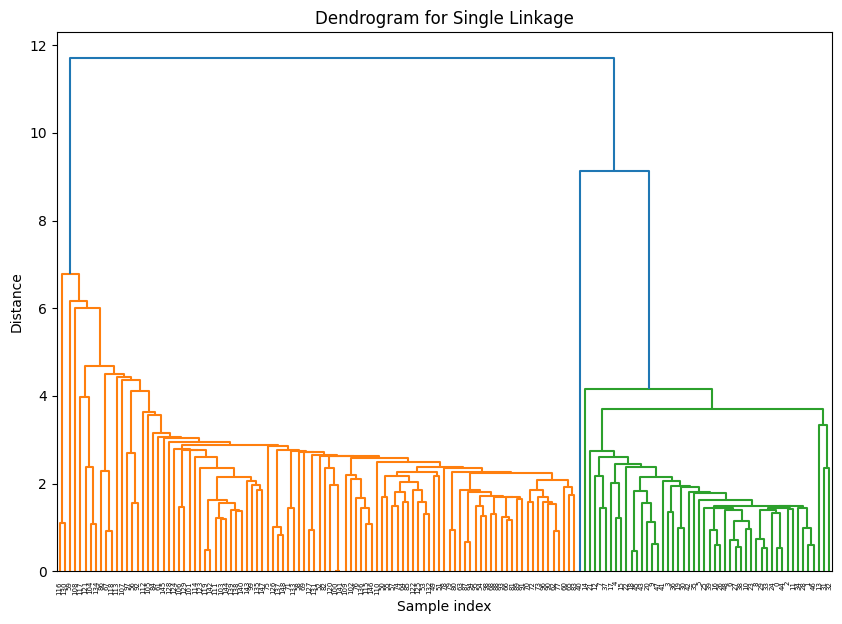

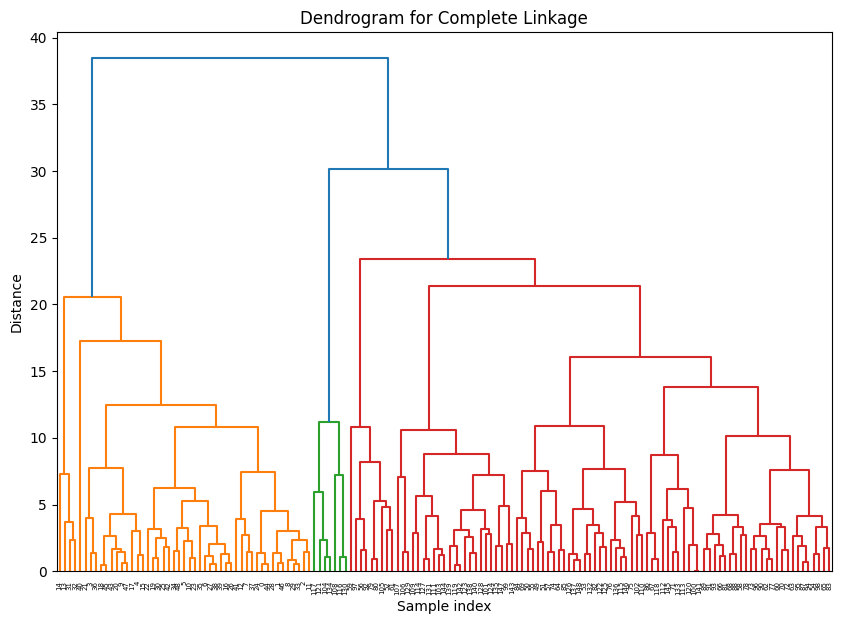

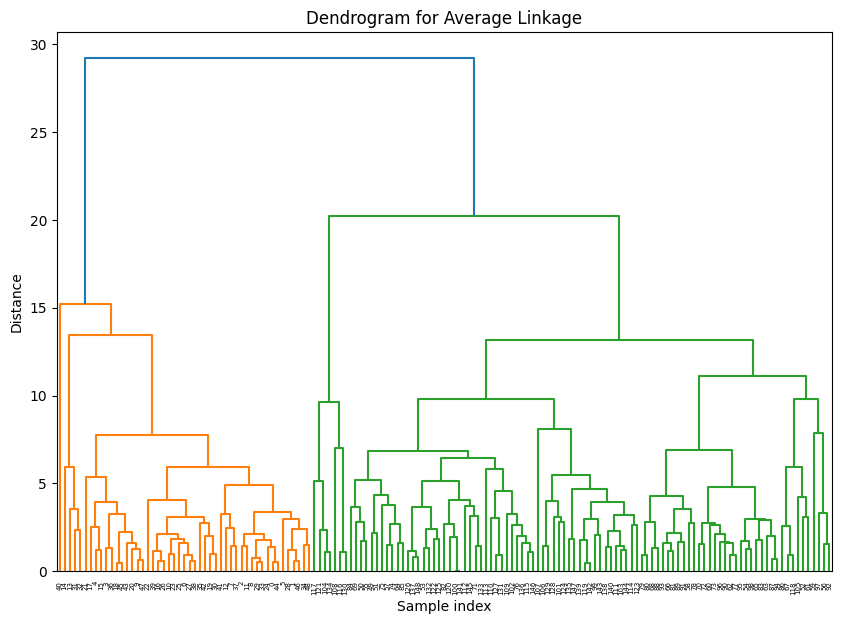

In [18]:

#THIS CODE IS WRITTEN FOR THE PURPOSE OF VISUALIZATION OF THE MERGING OF CLUSTERS 
#USING DENDROGRAM AND VENN DIAGRAM
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

data = pd.read_excel('Data.xlsx') 
X = data.iloc[:, 0:4].values
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

def calculate_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def calculate_distance_matrix(points):
    n = len(points)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            dist = calculate_distance(points[i], points[j])
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    return dist_matrix


def hierarchical_clustering_single_linkage(X):
    dist_matrix = calculate_distance_matrix(X)
    Z = sch.linkage(dist_matrix, method='single')
    return Z


def hierarchical_clustering_complete_linkage(X):
    dist_matrix = calculate_distance_matrix(X)
    Z = sch.linkage(dist_matrix, method='complete')
    return Z

def hierarchical_clustering_average_linkage(X):
    dist_matrix = calculate_distance_matrix(X)
    Z = sch.linkage(dist_matrix, method='average')
    return Z

def plot_dendrogram(Z, method_name):
    plt.figure(figsize=(10, 7))
    sch.dendrogram(Z)
    plt.title(f"Dendrogram for {method_name}")
    plt.xlabel("Sample index")
    plt.ylabel("Distance")
    plt.show()


Z_single = hierarchical_clustering_single_linkage(X_std)
Z_complete = hierarchical_clustering_complete_linkage(X_std)
Z_average = hierarchical_clustering_average_linkage(X_std)

plot_dendrogram(Z_single, "Single Linkage")
plot_dendrogram(Z_complete, "Complete Linkage")
plot_dendrogram(Z_average, "Average Linkage")